**Classification of Images Using CNNs with keras**
In this tutorial we will learn how to create a CNN with keras for classification of images. <br>
**Dataset**: CIFAR-10 <br> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. <br>
**Task**: We will be classifying cifar10 dataset. *We can load this dataset directly from `keras.datasets`.* <br>

The pipeline for classification of images will be the same as in the previous tutorial but instead of a Feed-Forward Neural Network we will use a CNN.
1. Load Data
2. Create the model (CNN)
3. Compile the model
4. Train the model
5. Evaluate the model (trained)

**1. Load Data:** <br>

In [1]:
import numpy as np
import keras
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

The shape shows that our training data has `50,000` samples with dimensions `32 x 32` and `3` channels i.e RGB. <br>
We could have converted the images to greyscale but we are keeping it in RGB. <br> 
*(You can experiment by converting the images to greyscale and observe the performance difference)*

In [4]:
# normalize the pixel values
X_train = np.array(X_train, dtype='float') / 255.0
X_test = np.array(X_test, dtype='float') / 255.0

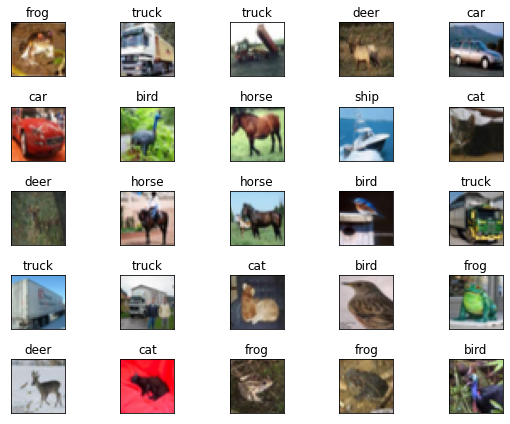

In [5]:
# visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8,6))

num=0
for i in range(5):
    for j in range(5):
        img = X_train[num]
        ax[i][j].imshow(img)
        ax[i][j].set_title(classes[y_train[num][0]])
        num += 1
        
ax[0][0].set_yticks([])
ax[0][0].set_xticks([])
plt.tight_layout()
plt.show()

In [6]:
y_train[0]

array([6], dtype=uint8)

The above line shows the label of first training sample. It shows that the label is an integer, means each class is represented by an integer starting from 0 upto 9. We will convert these integer labels to one-hot-encoded labels.

In [7]:
from keras.utils import to_categorical

In [8]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

**2. Create the Model (CNN):** <br>
Let's define our model, here we are creating a convolutional neural network (CNN). We are still using the `Sequential` model but we will use `convolutional layers` and `max-pooling layers` in this model alongwith `Dense layers` which will be added at the end.

In [9]:
from keras.models import Sequential

model = Sequential()

In [ ]:
input_shape = X_train[0].shape

Layers will be added using `.add()` function. <br>
`Conv2D` adds a 2D convolution kernel. The first two arguments it takes are no. of filters and filter size. We can specify the activation function, strides, padding etc using the keyword arguments. <br>
`MaxPooling2D` applies max-pooling operation on the input feature map and downsamples it by taking the maximum value over the window defined by `pool_size` for each dimension along the features axis.

In [12]:
from keras.layers import Dense, Conv2D

from keras import layers
model.add(keras.Input(shape=input_shape))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(y_train_ohe.shape[1], activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

**3. Compile the Model:** <br>
Now we will compile the model created above. <br>
We are using SGD as our optimizer and categorical crossentropy as our loss function.

In [13]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

**4. Train the Model:** <br>
Training the model using `.fit()` function for 50 epochs.

In [14]:
H = model.fit(X_train, y_train_ohe, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 27s 19ms/step - loss: 2.1819 - accuracy: 0.1805 - val_loss: 1.9860 - val_accuracy: 0.2574
Epoch 2/50
1407/1407 [==============================] - 26s 19ms/step - loss: 1.8560 - accuracy: 0.3206 - val_loss: 1.7245 - val_accuracy: 0.3710
Epoch 3/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6834 - accuracy: 0.3866 - val_loss: 1.6756 - val_accuracy: 0.3860
Epoch 4/50
1407/1407 [==============================] - 27s 20ms/step - loss: 1.5926 - accuracy: 0.4236 - val_loss: 1.5420 - val_accuracy: 0.4280
Epoch 5/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5327 - accuracy: 0.4437 - val_loss: 1.4929 - val_accuracy: 0.4572
Epoch 6/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4827 - accuracy: 0.4640 - val_loss: 1.4572 - val_accuracy: 0.4674
Epoch 7/50
1407/1407 [==============================] - 28s 20ms/step - loss: 1.4304 - accuracy: 0.4850 - val_loss: 1.3872 -

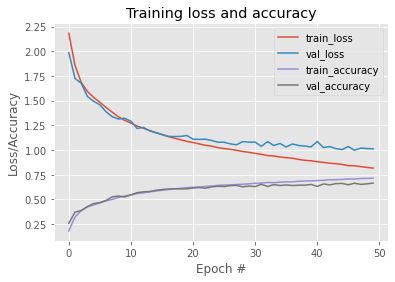

In [15]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

**5. Evaluate the trained Model:**

In [16]:
score = model.evaluate(X_test, y_test_ohe, batch_size=32)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

313/313 [==============================] - 3s 8ms/step - loss: 1.0482 - accuracy: 0.6397
Test Loss =  1.0481911897659302
Test Accuracy =  0.6396999955177307


In [18]:
'''CONFUSION MATRIX'''
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
print(confusion_matrix(y_test_ohe.argmax(axis=1), predictions.argmax(axis=1)))

[[625  35  82  14  20   7  13  19 146  39]
 [ 25 796  11   9   1   8  14   7  61  68]
 [ 55  17 569  60  56  85  81  40  28   9]
 [ 18  13  91 428  47 198 104  47  35  19]
 [ 18   6 141  59 495  68  97  88  24   4]
 [ 15   9 103 149  37 570  34  50  27   6]
 [  3   5  66  58  16  21 800  13  12   6]
 [ 10  17  60  48  60 102  16 644  20  23]
 [ 49  38  24  10   7   4  12   6 830  20]
 [ 32 157  18  18   3  17  24  19  72 640]]


In [20]:
'''CLASSIFICATION REPORT'''
from sklearn.metrics import classification_report
predictions = model.predict(X_test, batch_size=32)
print(classification_report(y_test_ohe.argmax(axis=1), predictions.argmax(axis=1), target_names=classes))

              precision    recall  f1-score   support

       plane       0.74      0.62      0.68      1000
         car       0.73      0.80      0.76      1000
        bird       0.49      0.57      0.53      1000
         cat       0.50      0.43      0.46      1000
        deer       0.67      0.49      0.57      1000
         dog       0.53      0.57      0.55      1000
        frog       0.67      0.80      0.73      1000
       horse       0.69      0.64      0.67      1000
        ship       0.66      0.83      0.74      1000
       truck       0.77      0.64      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



This is the end of this tutorial. We learnt how to create a CNN for classification using keras and trained it on cifar-10 dataset. We have created a simple model and performance is not good enough. You can try to improve the performance by experimenting with layers, optimizer and loss functions. <br>
Thanks.